

Aplicación del modelo SOM: Aplique el modelo SOM al otro conjunto de datos seleccionado. Explore el concepto de mapas autoorganizados y cómo se pueden utilizar para el análisis de datos.

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import load_diabetes
from sklearn_som.som import SOM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

diabetes = load_diabetes(as_frame=True)

print(diabetes.data.shape)

print(diabetes.target.shape)



(442, 10)
(442,)


In [2]:
db_data = np.array(diabetes.data)


scaler = StandardScaler()
db_data_s = scaler.fit_transform(db_data)
db_data = db_data_s[:, :2]

db_label = diabetes.target

print(db_data.shape)
print(db_label.shape)

(442, 2)
(442,)


In [3]:

diabetes_som = SOM(m=3, n=1, dim=db_data.shape[1])
diabetes_som.fit(db_data)

In [4]:
predictions = diabetes_som.predict(db_data)

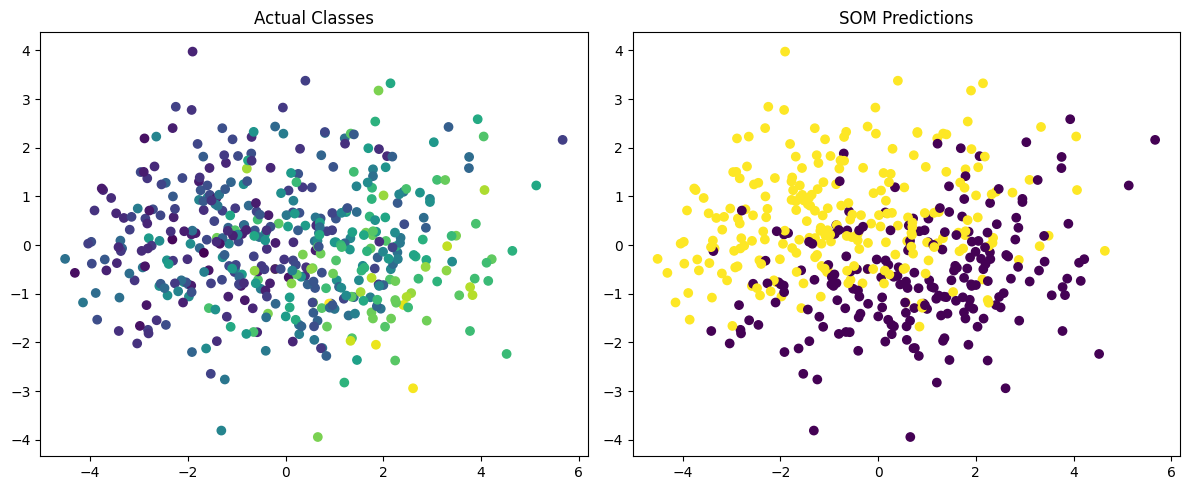

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
db_data_2d = pca.fit_transform(db_data_s)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(db_data_2d[:, 0], db_data_2d[:, 1], c=db_label, cmap='viridis')
plt.title('Actual Classes')

plt.subplot(122)
plt.scatter(db_data_2d[:, 0], db_data_2d[:, 1], c=predictions, cmap='viridis')
plt.title('SOM Predictions')

plt.tight_layout()
plt.show()